# Weekend movie trip

### __1. INDUSTRY__ 

__Movies__ industry is assigned.

### __2. DATA SETS__

__2.1. SOURCE__: The dataset is from [Grouplens](https://grouplens.org) in [this link](https://grouplens.org/datasets/movielens/).

__DESCRIPTION__: The four datasets containing related to movies, user rating, tags and imdb ratings will be combined. The following attributes from the datasets will be used for analysis.

|Attribute       | Datatype     |
| :------------- | ----------: |
| movieId | int64   |
| userId   | int64 |
|rating| float64|
|tag| object||

### __3. IDEAS__

__3.1.__ To suggest movies for users using tags and ratings with k-means clustering.

__3.2.__ To suggest movies for users using tags and ratings with DBSCAN clustering.

### __4. LOADING THE DATASETS__

__Load the libraries__

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__Import the csv files of dataset__

In [2]:
movies_data=pd.read_csv("movies.csv")
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
links_data=pd.read_csv("links.csv")
links_data.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
rating_data=pd.read_csv("ratings.csv")
rating_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
tags_data=pd.read_csv("tags.csv")
tags_data.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### __5. DATA PREPARATION__

__5.1 DATA CLEANING__

__Shape of all the data__

In [6]:
print("Movies: "+str(movies_data.shape))
print("Links: "+str(links_data.shape))
print("Ratings: "+str(rating_data.shape))
print("Tags: "+str(tags_data.shape))

Movies: (9742, 3)
Links: (9742, 3)
Ratings: (100836, 4)
Tags: (3683, 4)


__Drop the NaN rows__

In [7]:
movies_data=movies_data.dropna()
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
links_data=links_data.dropna()
links_data.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
rating_data=rating_data.dropna()
rating_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
tags_data=tags_data.dropna()
tags_data.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


__Shape of all the data__

In [11]:
print("Movies: "+str(movies_data.shape))
print("Links: "+str(links_data.shape))
print("Ratings: "+str(rating_data.shape))
print("Tags: "+str(tags_data.shape))

Movies: (9742, 3)
Links: (9734, 3)
Ratings: (100836, 4)
Tags: (3683, 4)


__Rating distribution__

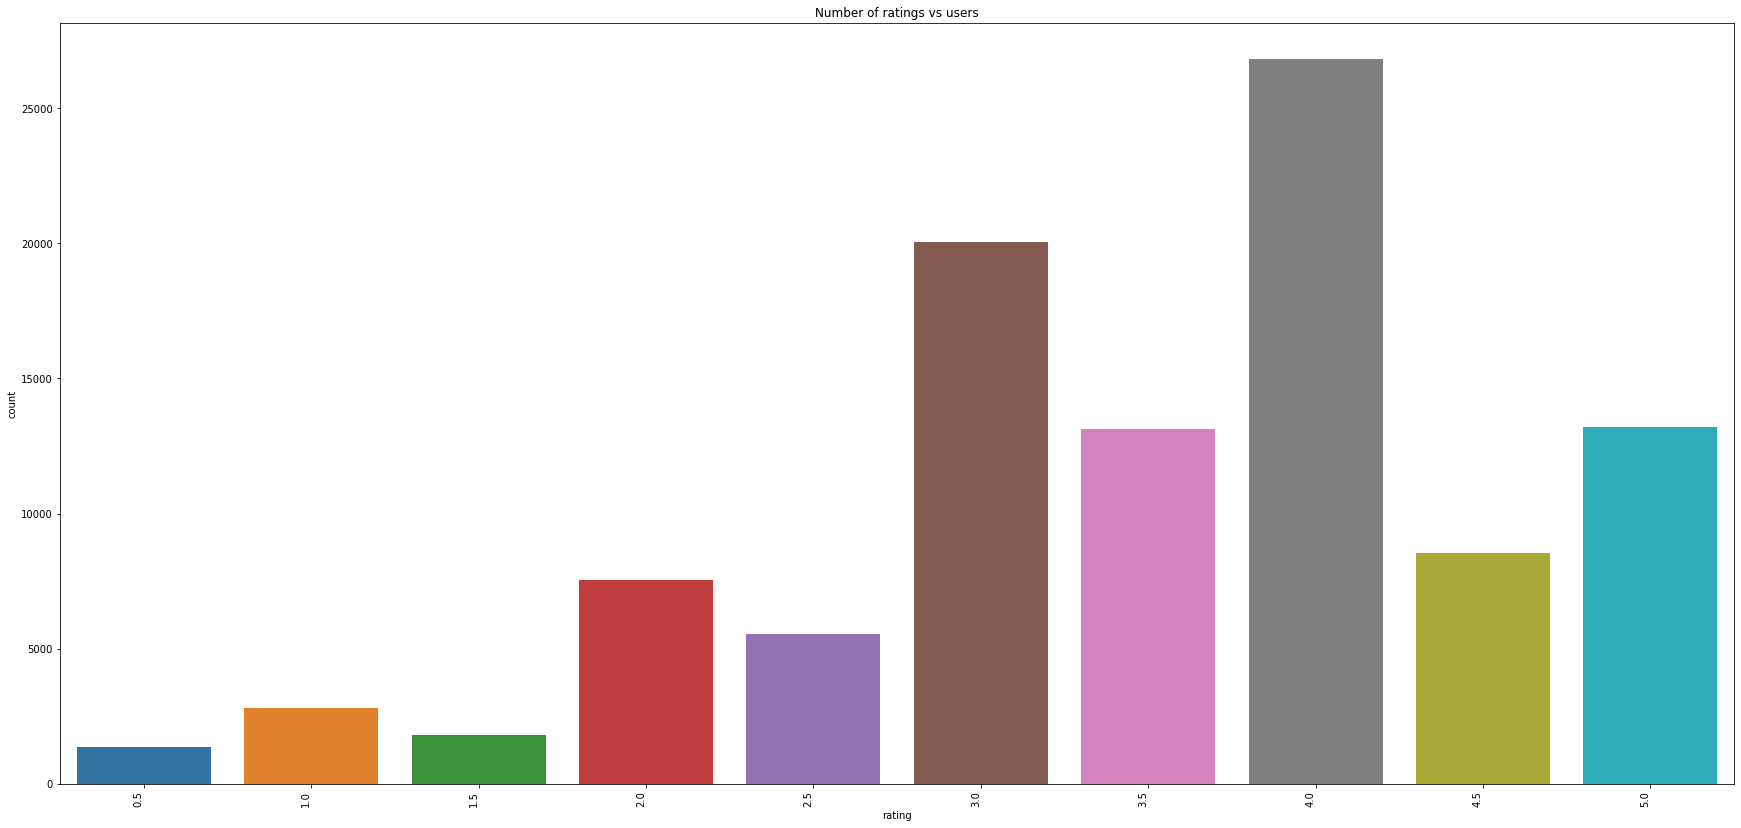

In [12]:
plt.figure(figsize=(30,14))
g = sns.countplot(x=rating_data['rating'], data=rating_data)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right");
g.set_title('Number of ratings vs users');

__Tags by each user__

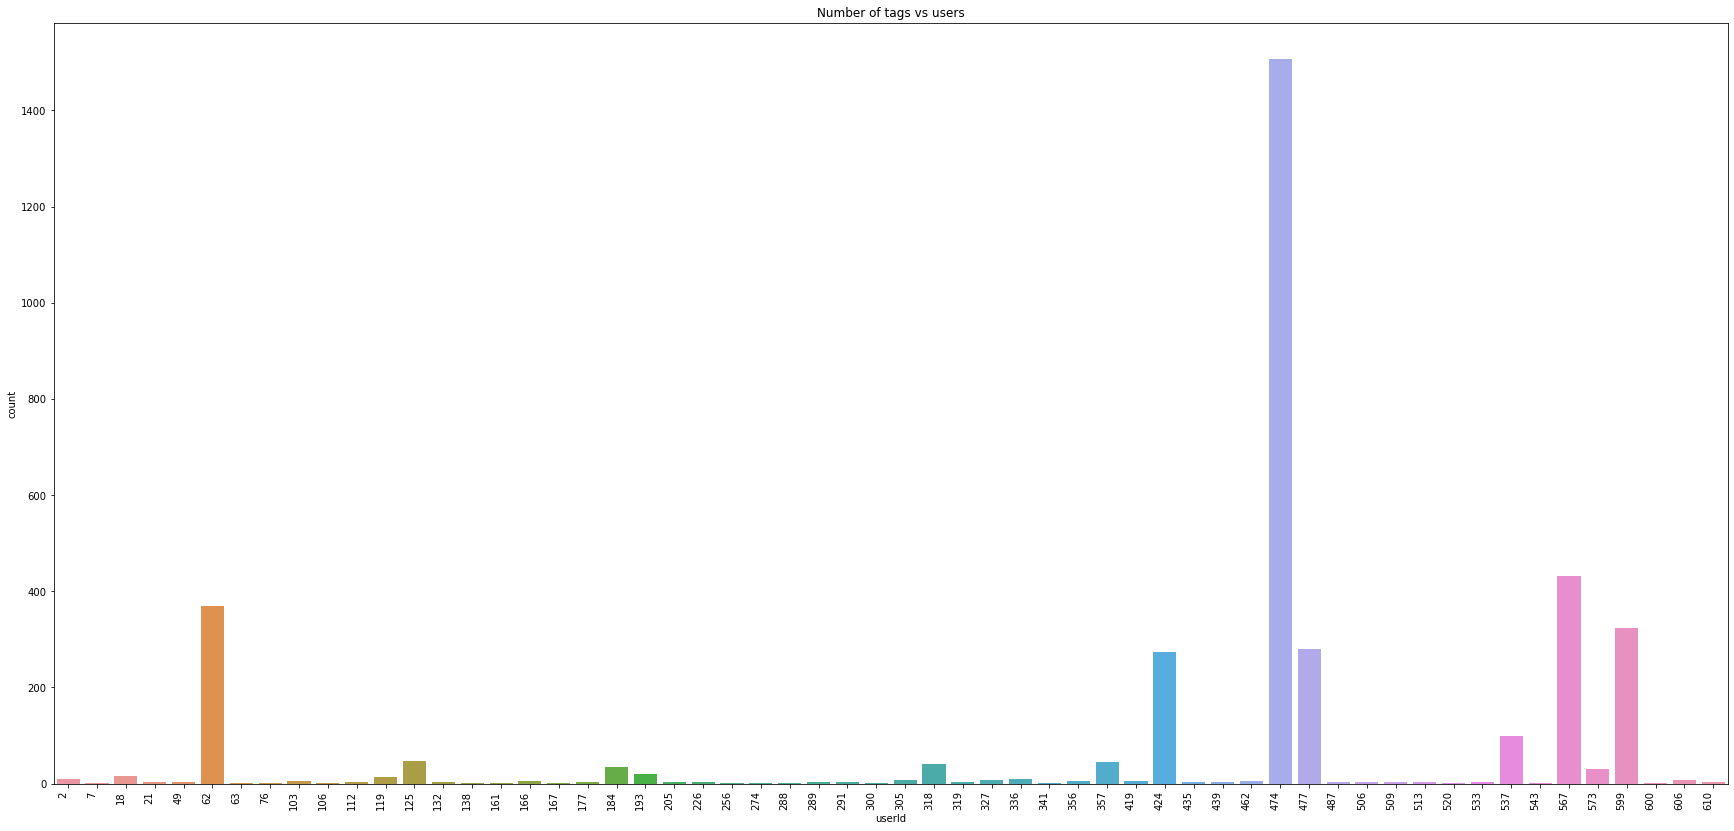

In [13]:
plt.figure(figsize=(30,14))
g = sns.countplot(x=tags_data['userId'], data=tags_data)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right");
g.set_title('Number of tags vs users');

__5.2 FORMATTING__

__Combining the tag word from tag table for each user and movie__

In [26]:
# new column for storing tag
rating_data['tag'] = ''
# assigning tags for each row with respect to the player
for i in range(len(rating_data)):
        movie_id=rating_data['movieId'].values[i]
        user_id=rating_data['userId'].values[i]
        for j in range(len(tags_data)):
            if ((tags_data['movieId'].values[j] == movie_id) & (tags_data['userId'].values[j]==user_id)):
                tag= tags_data['tag'].values[j]
                rating_data['tag'].values[i] = tag
rating_data.head()

,userId,movieId,rating,timestamp,tag
0,1,1,4.0,964982703,
1,1,3,4.0,964981247,
2,1,6,4.0,964982224,
3,1,47,5.0,964983815,
4,1,50,5.0,964982931,


__Dropping the rows with no tags__

In [27]:
rating_data['tag'].replace('', np.nan, inplace=True)
rating_data=rating_data.dropna()
rating_data.head()

,userId,movieId,rating,timestamp,tag
241,2,60756,5.0,1445714980,will ferrell
250,2,89774,5.0,1445715189,Tom Hardy
254,2,106782,5.0,1445714966,Martin Scorsese
1019,7,48516,1.0,1169687318,way too long
1808,18,431,4.0,1462138790,mafia


__Reset the index and drop the old index column__

In [28]:
rating_data=rating_data.reset_index()
del rating_data['timestamp']
rating_data.head()

,index,userId,movieId,rating,tag
0,241,2,60756,5.0,will ferrell
1,250,2,89774,5.0,Tom Hardy
2,254,2,106782,5.0,Martin Scorsese
3,1019,7,48516,1.0,way too long
4,1808,18,431,4.0,mafia


__Printing the dimension of the dataset__

In [29]:
del rating_data['index']
rating_data.shape

(1635, 4)

__Attributes and datatypes of the dataset__

In [30]:
for column in rating_data.columns:
    print(column, " is ", rating_data[column].dtype.name)

userId  is  int64
movieId  is  int64
rating  is  float64
tag  is  object


__5.3 VISUALIZATION__

__Barplot for ratings__

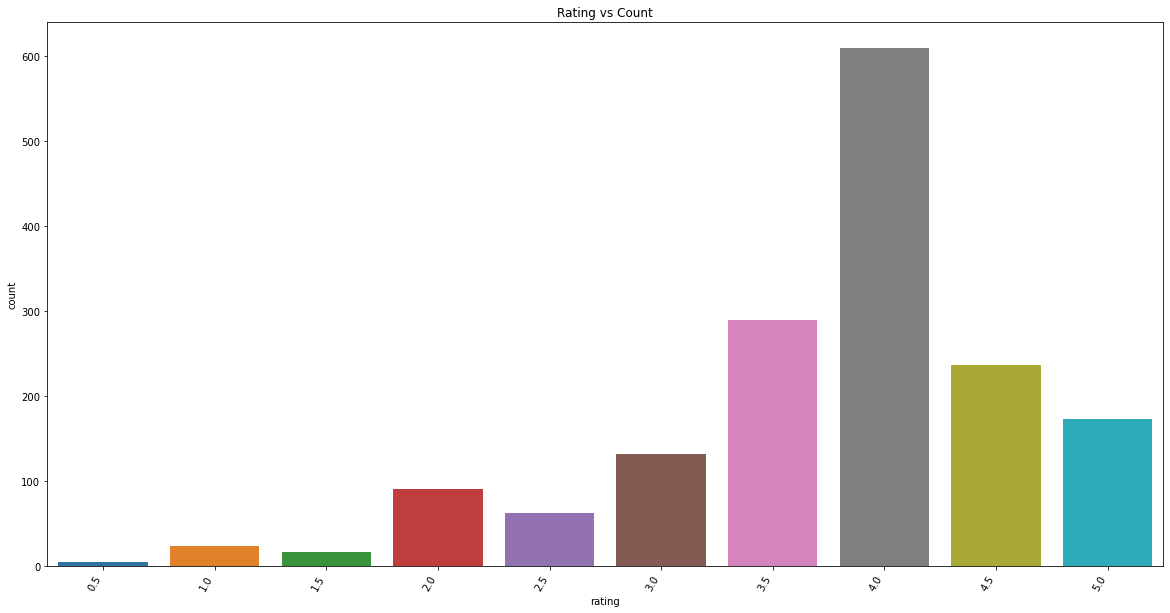

In [31]:
plt.figure(figsize=(20,10))
g = sns.countplot(x=rating_data['rating'], data=rating_data)
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha="right");
g.set_title('Rating vs Count');

__Barplot for user vs number of ratinngs__

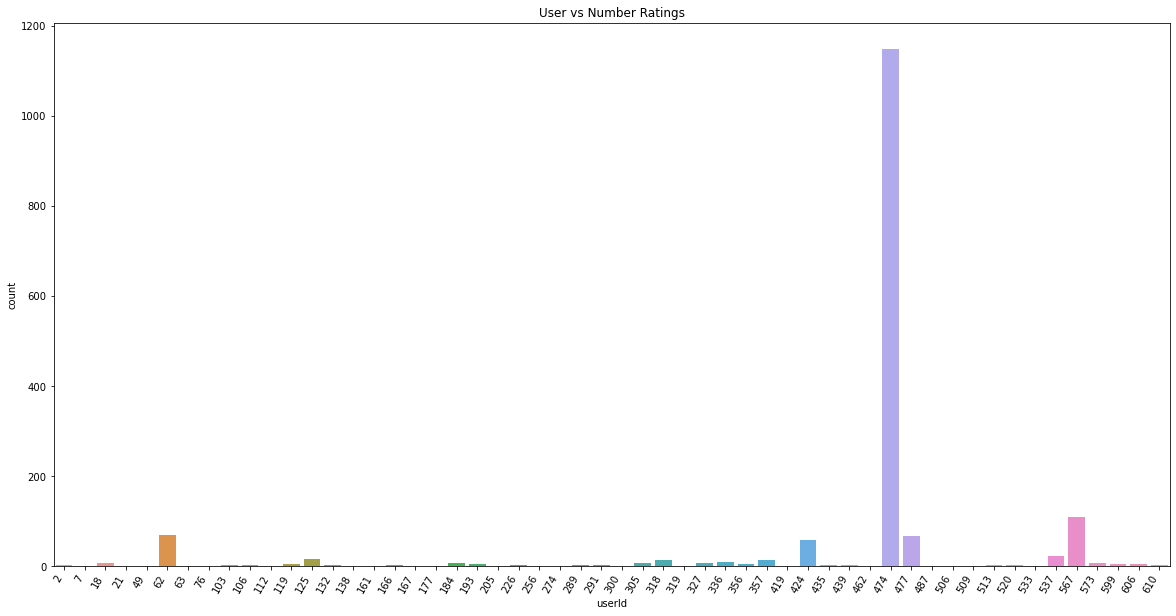

In [32]:
plt.figure(figsize=(20,10))
g = sns.countplot(x=rating_data['userId'], data=rating_data)
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha="right");
g.set_title('User vs Number Ratings');

__Deleting PlayerLinernumber to release memory__

In [33]:
del tags_data

__5.4 FEATURE ENGINEERING__

__Rearranging columns__

In [34]:
column_names = ["movieId", "userId", "tag","rating"]

rating_data = rating_data.reindex(columns=column_names)

rating_data.head()

,movieId,userId,tag,rating
0,60756,2,will ferrell,5.0
1,89774,2,Tom Hardy,5.0
2,106782,2,Martin Scorsese,5.0
3,48516,7,way too long,1.0
4,431,18,mafia,4.0


__Encoding the tag column using label encoder__

In [35]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
rating_data['tag_encode'] = lb_make.fit_transform(rating_data['tag'])
rating_data.head()

,movieId,userId,tag,rating,tag_encode
0,60756,2,will ferrell,5.0,774
1,89774,2,Tom Hardy,5.0,268
2,106782,2,Martin Scorsese,5.0,141
3,48516,7,way too long,1.0,762
4,431,18,mafia,4.0,498


__Rearranging the columns__

In [36]:
del rating_data['tag']

column_names = ["movieId", "userId","rating", "tag_encode"]

rating_data = rating_data.reindex(columns=column_names)

rating_data.head()

,movieId,userId,rating,tag_encode
0,60756,2,5.0,774
1,89774,2,5.0,268
2,106782,2,5.0,141
3,48516,7,1.0,762
4,431,18,4.0,498


__Normalizing the rating for each user from 0 to 5__

In [37]:
user_data=rating_data.userId.unique()
list1 = []
list2 =[]
for i in user_data:
    user_bar=rating_data.groupby(['userId']).get_group(i)
    min_val= user_bar.rating.min()
    max_val= user_bar.rating.max()
    OldRange = (max_val - min_val)  
    NewRange = (5 - 0)  
    if min_val != max_val:
        for j in range(len(rating_data)):
            if (rating_data['userId'].values[j] == user_bar['userId'].unique()[0]):
                    rating_data['rating'].values[j]= (((rating_data['rating'].values[j] - min_val) * NewRange) / OldRange) + 0 
rating_data

,movieId,userId,rating,tag_encode
0,60756,2,5.000000,774
1,89774,2,5.000000,268
2,106782,2,5.000000,141
3,48516,7,1.000000,762
4,431,18,2.500000,498
...,...,...,...,...
1630,5694,606,0.000000,6
1631,6107,606,3.333333,295
1632,7382,606,5.000000,423
1633,3265,610,5.000000,453


__Drop data values less than 3.5 rating__

In [67]:
ratings_data = rating_data[rating_data['rating'] >= 3.5] 
ratings_data = ratings_data.reset_index()
del ratings_data['index']

__5.5 CLUSTERING__

__5.5.1 To cluster the movies based on tags and rating.__

__Find the best k from Elbow method__

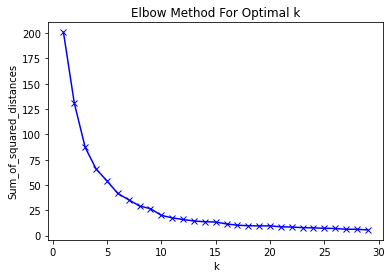

In [74]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = ratings_data.values[:,1:4]
X = np.nan_to_num(X)
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)
Sum_of_squared_distances = []
K = range(1,30)
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }
for k in K:
    km = KMeans(n_clusters=k, **kmeans_kwargs)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

__Find the best k from Silhoutte__

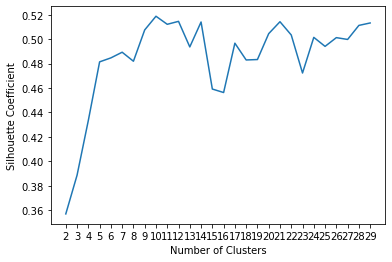

In [75]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }
X = ratings_data.values[:,1:4]
X = np.nan_to_num(X)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

__Preprocessing__

In [76]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-3.8961775 ,  1.8048161 ,  1.55903736],
       [-3.8961775 ,  1.8048161 , -0.61332554],
       [-3.8961775 ,  1.8048161 , -1.15856287],
       ...,
       [ 1.44401517,  1.8048161 ,  0.05212159],
       [ 1.47938068,  1.8048161 ,  0.18091781],
       [ 1.47938068,  1.8048161 , -1.35605041]])

__Performing k-means__

In [77]:
clusterNum =10
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 50)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 5 5 5 2 2 2 2 5 2 5 2 2 5 5 5 5 5 2 2 2 5 5 2 2 5 5 5 5 5 5 5 2 2 2 2 2
 5 5 5 2 2 5 2 2 5 2 2 2 2 2 5 5 5 2 2 6 2 2 2 5 5 5 2 5 2 5 2 6 5 5 2 2 2
 2 5 2 2 6 6 6 4 6 6 3 7 4 6 6 6 6 1 7 6 4 6 6 4 4 3 3 6 6 4 3 1 3 3 3 3 1
 3 1 3 3 0 3 3 1 3 0 3 3 4 3 3 1 3 4 1 4 3 1 1 3 3 1 9 3 3 3 9 4 3 1 9 9 1
 7 7 7 3 9 1 7 9 0 9 4 3 1 7 7 0 4 7 7 3 7 7 0 1 7 0 3 7 0 7 4 3 7 1 7 4 7
 7 1 7 7 4 7 0 7 4 4 7 9 3 7 7 9 7 7 4 7 7 7 7 0 4 1 4 0 0 3 1 7 4 0 3 3 7
 9 9 4 0 1 3 7 4 1 4 1 1 7 9 1 1 1 9 4 0 3 0 7 7 7 1 7 1 1 7 0 3 4 4 1 4 7
 7 9 7 7 4 4 9 3 9 0 4 1 9 3 3 4 9 1 1 4 0 1 1 1 3 1 1 9 7 1 7 1 1 0 4 7 1
 1 9 1 9 4 3 4 3 1 0 0 7 3 7 7 7 1 4 9 0 4 9 9 7 0 7 7 7 3 0 1 3 7 3 3 7 1
 7 4 0 1 4 9 4 4 3 3 4 4 1 3 7 7 0 7 4 1 7 3 4 9 4 7 7 3 7 0 4 0 7 0 9 4 7
 4 7 7 9 9 3 4 3 7 7 4 9 0 4 1 9 4 7 7 9 1 0 0 3 7 7 7 0 3 1 1 0 0 4 9 0 0
 3 9 9 3 0 7 0 0 1 7 4 0 7 9 3 7 1 1 0 1 7 0 9 7 7 3 3 0 1 4 4 0 3 3 0 3 3
 3 7 4 1 3 9 0 3 0 9 1 9 7 3 4 0 7 7 9 7 7 0 4 0 9 9 0 0 3 0 0 3 0 4 3 4 9
 4 0 9 1 0 9 4 9 1 0 7 0 

__Clustered column added to the data__

In [78]:
ratings_data["Clus_km"] = labels
ratings_data.head(5)

,movieId,userId,rating,tag_encode,Clus_km
0,60756,2,5.00,774,2
1,89774,2,5.00,268,5
2,106782,2,5.00,141,5
3,1221,18,5.00,136,5
4,5995,18,3.75,725,2


__View the centroids__

In [79]:
ratings_data.groupby('Clus_km').mean()

,movieId,userId,rating,tag_encode
Clus_km,,,,
0,10464.185185,479.748148,4.048560,470.244444
1,6613.020202,468.616162,4.313272,197.282828
2,59928.512195,90.219512,4.417683,686.585366
3,12524.934307,461.941606,4.166869,711.708029
4,9858.293333,470.326667,4.140741,329.366667
5,55843.400000,80.142857,4.403571,240.257143
6,32844.187500,293.250000,4.664062,523.312500
7,7678.373563,473.609195,4.190613,73.051724
8,48138.384615,565.923077,4.629630,716.076923


__Clustered data__

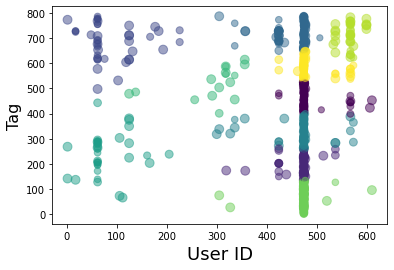

In [80]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 2], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('User ID', fontsize=18)
plt.ylabel('Tag', fontsize=16)
plt.show()

__Plotting 3D__

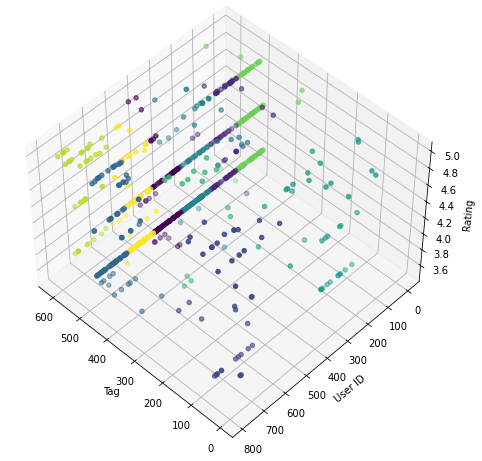

In [81]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.set_xlabel('Tag')
ax.set_ylabel('User ID')
ax.set_zlabel('Rating')

ax.scatter(X[:, 0], X[:, 2], X[:, 1], c= labels.astype(np.float))

__Finding movie for movieId using movie dataset__

In [82]:
# new column for movie name
ratings_data['Movie'] = ''
# assigning title for each row with respect to the movieId
for i in range(len(ratings_data)):
        movie_id=ratings_data['movieId'].values[i]
        for j in range(len(movies_data)):
            if (movies_data['movieId'].values[j] == movie_id):
                movie= movies_data['title'].values[j]
                ratings_data['Movie'].values[i] = movie
ratings_data.head()

,movieId,userId,rating,tag_encode,Clus_km,Movie
0,60756,2,5.00,774,2,Step Brothers (2008)
1,89774,2,5.00,268,5,Warrior (2011)
2,106782,2,5.00,141,5,"Wolf of Wall Street, The (2013)"
3,1221,18,5.00,136,5,"Godfather: Part II, The (1974)"
4,5995,18,3.75,725,2,"Pianist, The (2002)"


__Printing the movies suggestion__

In [90]:
user_data=ratings_data.userId.unique()
for i in user_data:
    user_bar=ratings_data.groupby(['userId']).get_group(i)
    print("UserID: "+str(user_bar.userId.unique())+"Cluster: "+str(user_bar.Clus_km.unique()))
    for j in range(len(user_bar.Clus_km.unique())):
        clu=user_bar.Clus_km.unique()[j]
        movies_bar=ratings_data.groupby(['Clus_km']).get_group(clu)
        print(str(movies_bar.Movie.values[:3]))

UserID: [2]Cluster: [2 5]
['Step Brothers (2008)' 'Pianist, The (2002)' 'Lucky Number Slevin (2006)']
['Warrior (2011)' 'Wolf of Wall Street, The (2013)'
 'Godfather: Part II, The (1974)']
UserID: [18]Cluster: [5 2]
['Warrior (2011)' 'Wolf of Wall Street, The (2013)'
 'Godfather: Part II, The (1974)']
['Step Brothers (2008)' 'Pianist, The (2002)' 'Lucky Number Slevin (2006)']
UserID: [49]Cluster: [2]
['Step Brothers (2008)' 'Pianist, The (2002)' 'Lucky Number Slevin (2006)']
UserID: [62]Cluster: [5 2]
['Warrior (2011)' 'Wolf of Wall Street, The (2013)'
 'Godfather: Part II, The (1974)']
['Step Brothers (2008)' 'Pianist, The (2002)' 'Lucky Number Slevin (2006)']
UserID: [63]Cluster: [2]
['Step Brothers (2008)' 'Pianist, The (2002)' 'Lucky Number Slevin (2006)']
UserID: [76]Cluster: [2]
['Step Brothers (2008)' 'Pianist, The (2002)' 'Lucky Number Slevin (2006)']
UserID: [103]Cluster: [2]
['Step Brothers (2008)' 'Pianist, The (2002)' 'Lucky Number Slevin (2006)']
UserID: [106]Cluster: [5]
